# Graph Lab

## Header information:

  - Author #1: Hammad Pathan (pathanh@mcmaster.ca)
  - Author #2: Longpan Zhou (zhoul83@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/pathanh/l1-graph-lab
  - Avenue to Learn group name: Graph 23

## WEEK 1

## Load Graph Using Library

In [8]:
from GraphMetrics.ConnectedComponents import ConnectedComponents
from Graph import Graph
from GraphMetrics.Nodes import Nodes
from GraphMetrics.Edges import Edges
from Factory.ExtractionSpawner import ExtractionSpawner


graph = Graph()
Spawner = ExtractionSpawner()
thegraph = Spawner.spawn("type1",graph)
thegraph.createGraph()

nodes = Nodes(graph)
edges = Edges(graph)

#print to view graph if you want
#print(graph.graph) 

#print metrics
print("\n\nNumber of nodes: ", nodes.getMetric())
print("Number of edges: ", edges.getMetric(), "\n")



Number of nodes:  302
Number of edges:  406 



## Draw the distribution of node’s degree

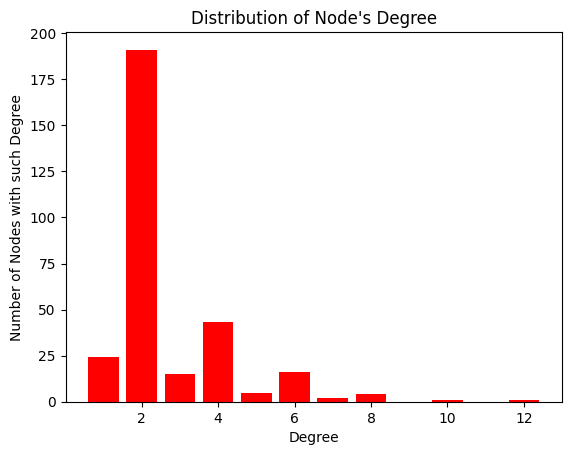

{5: 5, 3: 15, 4: 43, 2: 191, 10: 1, 6: 16, 1: 24, 7: 2, 8: 4, 12: 1}

In [9]:
import matplotlib.pyplot as plt;

def plot(g):

    degree = {}

    for key in g.graph:
        if len(g.graph.get(key)) in degree:
            degree[len(g.graph.get(key))] += 1
        elif len(g.graph.get(key)) not in degree:
            degree[len(g.graph.get(key))] = 1

    plt.bar(degree.keys(), degree.values(), color='r')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes with such Degree')
    plt.title("Distribution of Node's Degree")
    plt.show()

    return degree

plot(graph)

## BENCHMARK STUFF

- What are the right KPIs to measure?

    One KPI to measure would be number of nodes visited, Dijkstra should be visiting all the nodes in the graph, whereas AStar isn't.
    Another KPI to measure would be the number of comparisons between heuristics / weights since both algorithms take into account the time it takes to travel from one station to another.
    One more KPI could be the number of lines used, since the ranking of one itinerary could be better because a person does not want to switch lines often. Unfortunately due to time constraints this KPI was not implemented.

- What are the right cases (itineraries) to consider for this benchmark?

    The right cases to consider for this benchmark would be very long paths so that both algorithms are used thoroughly and hypothetically give the same results since time taken to travel and coordinates between two stations are intertwined. The time taken to travel between two stations is relative to the distance between coordinates of two stations. Another case would be two paths that connect the same two stations with the same weight but one path uses less lines.

- Implement the benchmark (see Benchmark.py)

## CLASS DIAGRAM OF IMPLEMENTATION
![week1uml](week1uml.png)


## DESIGN CHOICES JUSTIFICATION

For this project we were required to follow SOLID principles to ensure a proper object oriented design. To satisfy the principles we decided to implement the Factory and Strategy patterns. Both patterns follow SOLID principles and make the implemenation of this library simpler. 

To begin with, we created a Graph class which will act as a data structure in which the entire connected train system will be stored. We were told to consider separating responsibilites between "being a graph" and "building a graph". This is because it is possible the file structure where we get the information from my change and so our implementation of the library should be independant of that. So in our Graph class we focused on only developing a data structure, with possibilites of adding stations and edges with weights to it. 

As for building the graph, this is where the Factory pattern comes in. We created a Factory with initializes an empty graph and then we set up an ExtractorSpawner which chooses a certain extraction type (depending on file formats) and then extracts the data specifically for that type of file format into our empty data structure. This follows SOLID principles as now our data structure is independant of file formats and if we have new file formats we simply add another extraction type which we can then call as needed.

Next we were asked to quantify the graph with metrics such as how many nodes and edges. And we should consider how the metrics extraction is designed to support the inclusion of metrics in an open closed way. As a solution we decided to create an Abstract Class called GraphMetric which contains an abstract method called getmetrics(). Next we create classes that inherit GraphMetric so they all contain getmetrics() and so when we want to calculate metrics we simply create the metric object and call the getmetric() method. If we want to add new metrics we simply just add another class which inherits from GraphMetric and call the metric as we need to. This satisfies open/closed princple.

Following, we needed to design a way use multiple algorithms on our data structure. Here we decided to use a Strategy pattern which contains an interface. This way we can call multiple algorithms on the same object. We create classes for the algorithms which are called by the interface. This way if we want to add more algorithms we simply create another algorithm class for the algorithm and call it using our interface. This follows open for extension, closed for modification, as well as single responsibility principles.

Our itinerary is the last implementation in our design. The itinerary needs to be able to access the path finding algorithsm on the data structure. And so it uses both graph and the algorithms using the same interface so select between algorithms.

Overall our design successfully follows SOLID principles and is a good implementation for this train system.

## BENCHMARK ANALYSIS

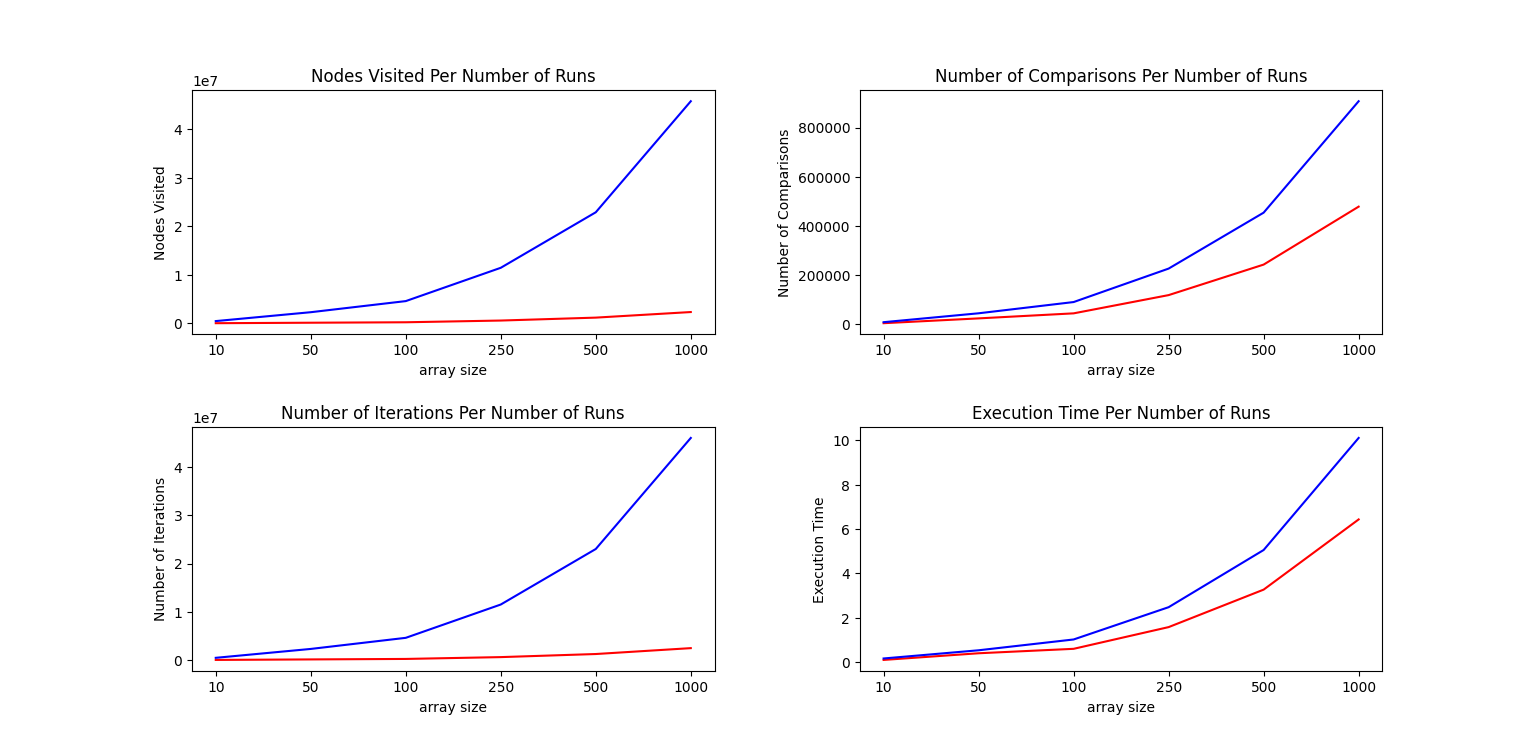

These graphs show the KPIs we measured for each algorithm. Our benchmark creates multiple arrays of sizes 10, 50, 100, 250, 500 and 1000 and in these arrays are multiple lists of two stations that need to be inputted into our algorithms. We quantified these KPIs by keeping track of the number of times certain actions were made. We counted the number of iterations of the the loops, the number of nodes visited, the number of comparisions made by the algorithms, and the execution times for each algorithm. We summed these KPIs up for each array size to give us accurate benchmarks with multiple test cases.

Looking at our first graph: Nodes Visited per Number of Runs, we compare the metric for both Dijkstra and AStar. Given how the dijkstra algorithm runs we can see that the number of nodes visited increases exponentially as the array size increases. This is because dijkstra visits every single node in the graph every time it is called. Whereas with AStar it only visits nodes closeby and slowly goes outwards until it reaches its target and than stops visiting nodes. Therefor Astar has a much less steep graph as it doesn't visit nearly as many nodes as dijkstra does.

Looking at our second graph: Number of Comparisons Per Number of Runs, we compare the metric for both Dijkstra and Astar. Because both algorithms need to compare weights everytime when visiting a node, we can see that the number of comparisons is a bit more similiar for both. However dijkstra's algorithm does have almost 2/3 more comparisions than astar. Again this is because dijkstra visits evvery single node in the graph wheras astar stops visiting nodes after the sceond station is found.

Looking at our third graph: Number of Iteratons per Number of Runs, we compare the metric for both Dijkstra and Astar. This graph is very similar to the number of nodes visited per number of runs and this is because for both algorithms the nodes visited is directly related to number of iterations as each iteration of a loop is a node visited.

Looking at our last graph: Execution Time Per Number of Runs, we compare the metric for both Dijkstra and Astar. Excution time is measured in seconds and it makes sense that dijkstras algorithm takes a longer time to execute than astar at very large array sizes because of the fact that astar visits less nodes and therefore finish before dijkstra given the same dataset. However, we can see at small array sizes these execute pretty much as fast as each other with a difference of a few milliseconds.

These benchmarks are a great way to compare both algorithsm as they accurately count key KPIS which test how both algorithms run.

Running Benchmark on Dataset with Dijkstra
Number of Nodes Visited:
{'10': 457530, '50': 2287650, '100': 4575300, '250': 11438250, '500': 22876500, '1000': 45753000}
Number of Comparisons:
{'10': 9039, '50': 45587, '100': 90758, '250': 226644, '500': 453755, '1000': 906651}
Number of Iterations:
{'10': 460550, '50': 2302750, '100': 4605500, '250': 11513750, '500': 23027500, '1000': 46055000}
Execution Times:
{'10': 0.047040700912475586, '50': 0.23520231246948242, '100': 0.46490001678466797, '250': 1.1554958820343018, '500': 2.317993402481079, '1000': 4.626981973648071}
Running Benchmark on Dataset with AStar
Number of Nodes Visited:
{'10': 23580, '50': 121567, '100': 244465, '250': 612778, '500': 1116847, '1000': 2398944}
Number of Comparisons:
{'10': 5095, '50': 24807, '100': 50187, '250': 127675, '500': 234093, '1000': 499530}
Number of Iterations:
{'10': 25132, '50': 129169, '100': 259637, '250': 651858, '500': 1189258, '1000': 2552023}
Execution Times:
{'10': 0.029524803161621094, 

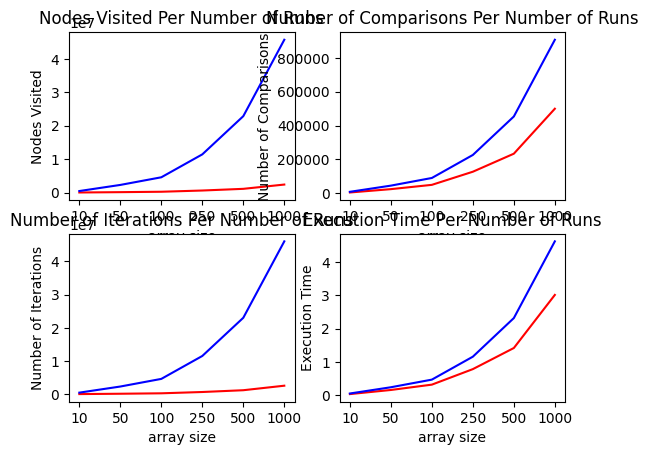

In [10]:
import random
from Graph import Graph
from Factory.ExtractionSpawner import ExtractionSpawner
from GraphMetrics.Nodes import Nodes
from Strategy.Algorithms import Algorithms
from Strategy.AStar import AStar
from Strategy.Dijkstra import Dijkstra
import time
import matplotlib.pyplot as plt


def main():
    """Running the complete benchmark"""

    graph = Graph()
    Spawner = ExtractionSpawner()
    thegraph = Spawner.spawn("type1", graph)
    thegraph.createGraph()

    nodes = Nodes(graph)
    numstations = nodes.getMetric()

    listofstations = []
    for key in graph.graph:
        listofstations.append(int(key))

    dataset = {
        "10": [],
        "50": [],
        "100": [],
        "250": [],
        "500": [],
        "1000": []
    }

    for key in dataset:
        for i in range(int(key)):
            dataset[key].append(gen_stations(listofstations))

    # create algorithm object for this graph
    algorithm = Algorithms(graph)

    # set algorithm to dijkstra and calculate path
    algorithm.setStrat(Dijkstra())
    print("Running Benchmark on Dataset with Dijkstra")
    benchdata_dijkstra = multi_pathfind(algorithm, dataset)

    print("Number of Nodes Visited:")
    print(benchdata_dijkstra[0])

    print("Number of Comparisons:")
    print(benchdata_dijkstra[1])

    print("Number of Iterations:")
    print(benchdata_dijkstra[2])

    print("Execution Times:")
    print(benchdata_dijkstra[3])

    print("Running Benchmark on Dataset with AStar")
    algorithm.setStrat(AStar())
    benchdata_astar = multi_pathfind(algorithm, dataset)

    print("Number of Nodes Visited:")
    print(benchdata_astar[0])

    print("Number of Comparisons:")
    print(benchdata_astar[1])

    print("Number of Iterations:")
    print(benchdata_astar[2])

    print("Execution Times:")
    print(benchdata_astar[3])

    plotstuff(benchdata_astar, benchdata_dijkstra)


def multi_pathfind(algorithmtouse: Algorithms, dataset):
    resultnumnodes = {
        "10": 0,
        "50": 0,
        "100": 0,
        "250": 0,
        "500": 0,
        "1000": 0
    }
    resultcomparisons = {
        "10": 0,
        "50": 0,
        "100": 0,
        "250": 0,
        "500": 0,
        "1000": 0
    }
    resultiterations = {
        "10": 0,
        "50": 0,
        "100": 0,
        "250": 0,
        "500": 0,
        "1000": 0
    }
    resultexecutiontimes = {
        "10": 0,
        "50": 0,
        "100": 0,
        "250": 0,
        "500": 0,
        "1000": 0
    }

    for k in dataset:
        for i in range(int(k)):
            timestart = time.time()
            data = algorithmtouse.runalgorithm(
                dataset[k][i][0], dataset[k][i][1])
            resultnumnodes[k] += data["numnodesvisited"]
            resultcomparisons[k] += data["numofcomparisons"]
            resultiterations[k] += data["numofiterations"]
            resultexecutiontimes[k] += time.time() - timestart

    return resultnumnodes, resultcomparisons, resultiterations, resultexecutiontimes

# return two random stations in range of all the stations


def gen_stations(stationlist):
    n = [random.choice(stationlist), random.choice(stationlist)]
    return n


def plotstuff(astar_data, dijkstra_data):
    fig, ax = plt.subplots(nrows=2, ncols=2)

    ax[0, 0].plot(astar_data[0].keys(), astar_data[0].values(),
                  color='r', label='A*')
    ax[0, 0].plot(dijkstra_data[0].keys(),
                  dijkstra_data[0].values(), color='b', label='Dijkstra')
    ax[0, 0].set_xlabel('array size')
    ax[0, 0].set_ylabel('Nodes Visited')
    ax[0, 0].title.set_text("Nodes Visited Per Number of Runs")

    ax[0, 1].plot(astar_data[1].keys(), astar_data[1].values(),
                  color='r', label='A*')
    ax[0, 1].plot(dijkstra_data[1].keys(),
                  dijkstra_data[1].values(), color='b', label='Dijkstra')
    ax[0, 1].set_xlabel('array size')
    ax[0, 1].set_ylabel('Number of Comparisons')
    ax[0, 1].title.set_text("Number of Comparisons Per Number of Runs")

    ax[1, 0].plot(astar_data[2].keys(), astar_data[2].values(),
                  color='r', label='A*')
    ax[1, 0].plot(dijkstra_data[2].keys(),
                  dijkstra_data[2].values(), color='b', label='Dijkstra')
    ax[1, 0].set_xlabel('array size')
    ax[1, 0].set_ylabel('Number of Iterations')
    ax[1, 0].title.set_text("Number of Iterations Per Number of Runs")

    ax[1, 1].plot(astar_data[3].keys(), astar_data[3].values(),
                  color='r', label='A*')
    ax[1, 1].plot(dijkstra_data[3].keys(),
                  dijkstra_data[3].values(), color='b', label='Dijkstra')
    ax[1, 1].set_xlabel('array size')
    ax[1, 1].set_ylabel('Execution Time')
    ax[1, 1].title.set_text("Execution Time Per Number of Runs")
    plt.show()


main()

## WORK SPLIT

- Hammad: create library structure, all classes and class diagram, implement SOLID patterns, create TSP, create benchmark, analyze benchmark
- Patrick: create plots, create astar algorithm, create dijkstra algorithm, create connected components, run coverage, run flake, analyze tsp and connected components

## WEEK 2

## Updated Class Diagram with Justifications

![week2uml](week2umlpng.png)

In this new class diagram, we simply added a new Connected Components metric and a TSP algorithm. Because of how well our design is implemented, to add these features all we need to do is create the corresponding class files and then make them inherit from above. For ConnectedComponents it is under GraphMetrics because it is a type of metric. As for TSP we put it under the Algorithms interface and call it from the interface.

These additions still follow all SOLID principles.
S - each class has a single responsibility
O - for all of these, they are open for extension and closed for modification
L - every subclass is substitutable for its parent class
I - the interface implemented is used as needed and clients aren't forced to use methods they don't need to
D - the entities all depend on abstractions, not concretes

## Executable Example of TSP

In [11]:
####################
## run a tsp with some list
########################
from GraphMetrics.ConnectedComponents import ConnectedComponents
from Graph import Graph
from GraphMetrics.Nodes import Nodes
from GraphMetrics.Edges import Edges
from Factory.ExtractionSpawner import ExtractionSpawner
from Itinerary import Itinerary
from Strategy.Algorithms import Algorithms
from Strategy.AStar import AStar
from Strategy.Dijkstra import Dijkstra
from Strategy.TSP import TSP

# create the graph
graph = Graph()
Spawner = ExtractionSpawner()
thegraph = Spawner.spawn("type1", graph)
thegraph.createGraph()

algorithm = Algorithms(graph)

algorithm.setStrat(TSP())
algorithm.runtspalgorithm([20,21,23,25])

The most efficient path for stations [20, 21, 23, 25] is: [20, 217, 203, 63, 219, 43, 183, 42, 41, 23, 157, 233, 279, 87, 255, 25, 161, 44, 166, 263, 3, 295, 244, 164, 33, 36, 289, 200, 270, 78, 15, 269, 21] with a travel time of: 67


## Executable Example of Connected Components

In [12]:
####################
# do strongly connected components for graph
####################
from GraphMetrics.ConnectedComponents import ConnectedComponents
from Graph import Graph
from GraphMetrics.Nodes import Nodes
from GraphMetrics.Edges import Edges
from Factory.ExtractionSpawner import ExtractionSpawner
from Itinerary import Itinerary
from Strategy.Algorithms import Algorithms
from Strategy.AStar import AStar
from Strategy.Dijkstra import Dijkstra
from Strategy.TSP import TSP

# create the graph
graph = Graph()
Spawner = ExtractionSpawner()
thegraph = Spawner.spawn("type1", graph)
thegraph.createGraph()

connectedcomponents = ConnectedComponents(graph)
print(connectedcomponents.getMetric())

[[1, 73, 234, 265, 182, 194], [2, 156, 263, 167, 188], [3, 295], [4, 70, 201, 284, 292], [5, 252], [7, 145, 223], [8, 124, 264], [9, 31, 232, 303], [10, 95, 128, 160, 123, 224, 266, 260], [11, 163, 212, 83, 104, 28, 249, 94, 193, 162, 192, 107, 254, 290, 282, 278, 218, 197, 259, 277, 285, 133, 273, 283, 146, 236], [12, 56, 257, 258], [13, 250, 225, 157, 279, 262, 276, 233], [14, 92], [15, 78, 269, 270], [16, 91, 173, 109], [17, 110, 293, 74, 209, 99, 122, 138, 287, 242, 186, 208], [18], [19, 97], [20, 65, 217], [21, 67], [22, 47, 111], [24, 164, 247, 244, 289], [25, 161, 255], [26, 274], [27, 79], [29, 84, 148, 136, 191, 245, 272], [30, 176, 190], [32, 204], [33, 36], [34, 100, 119], [38, 58, 81], [39], [40, 89, 139, 170], [42, 120, 183, 238], [44, 166], [45, 207, 243], [48, 126], [49, 87, 151], [51, 103, 215, 301], [52], [54, 55], [59, 240], [60], [61, 171], [63, 203, 219], [66, 85, 129, 268], [71, 172, 297], [72, 286], [75, 210, 222, 291, 235, 251], [76, 181, 296], [77, 93, 165, 288,

## Analysis of TSP and ConnectedComponents, both theoretical and empirical

Note: Theoretical and Empirical explaination uses the examples ran above ^

### TSP

#### -Theoretical:
In theory, our TSP algorithm's time complexity is O(n^2*m!). Where n is the number of total nodes and m is the number of stations TSP needs to pass. 

In the algorithm, we produced the permutations between all the stations, which produces n!. Then we have a loop that loops through the length of the path(n: maximum with every node included), with an inner loop that loops through the length of the shortest path(n: maximum with every node included).

#### -Empirical:

In our example above, given by stations [20, 21, 23, 25]. The permutation produced is [(20, 21, 23, 25), (20, 21, 25, 23), (20, 23, 21, 25), (20, 23, 25, 21), (20, 25, 21, 23), (20, 25, 23, 21), (21, 20, 23, 25), (21, 20, 25, 23), (21, 23, 20, 25), (21, 23, 25, 20), (21, 25, 20, 23), (21, 25, 23, 20), (23, 20, 21, 25), (23, 20, 25, 21), (23, 21, 20, 25), (23, 21, 25, 20), (23, 25, 20, 21), (23, 25, 21, 20), (25, 20, 21, 23), (25, 20, 23, 21), (25, 21, 20, 23), (25, 21, 23, 20), (25, 23, 20, 21), (25, 23, 21, 20)]. Which matches m!. And count for # of times executed is 7354 times. Since it's not the worst case looping through every node, so the results are way better.

### ConnectedComponents

#### -Theoretical:

In theory, because Strongly Connected components are based on BFS algorithm, they will share the same time complexity O(n + e), where n is the number of nodes and N is the number of edges.

In the algorithm, we start from one node and until every node is seen(n: all the nodes included), when on a node it checks for its edges for neighboring nodes(e:every edge included).

#### -Empirical:

In our example above, given by the graph object. It has looped through every node and every edge as expected. Which produces the exact result as our theoretical result.

## Week 3 - Random Graph Generator

In [13]:
import random

from Graph import Graph


class rdg:

    def __init__(self, num_nodes, num_degrees, num_lines, max_time):
        if num_nodes == len(num_degrees) and num_lines > 0 and max_time > 0:
            self.num_nodes = num_nodes
            self.num_degrees = num_degrees
            self.num_lines = num_lines
            self.max_time = max_time
        else:
            self.num_nodes = 0
            self.num_degrees = 0
            self.num_lines = 0
            self.max_time = 0
            print("Number of Edges given does not match the length of num_degrees list")

    def generate(self):
        graph = Graph()

        def random_exclude(exclude):
            r = exclude
            while r == exclude:
                r = random.randint(1, self.num_nodes)
            return r

        for i in range(self.num_nodes):
            print(f"adding{i + 1}")
            graph.addNode(i + 1)
            for j in range(self.num_degrees[i]):
                graph.addEdge(i + 1, random_exclude(i + 1), random.randint(1, self.num_lines), random.randint(1, self.max_time))

        return graph

rdg_1 = rdg(2, [1, 1], 1, 1)
print(rdg_1.generate().getGraph())

rdg_2 = rdg(10, [2, 3, 4, 5, 2, 4, 2, 3, 5, 1], 3, 3)
print(rdg_2.generate().getGraph())

adding1
Vertex  2  does not exist.
adding2
{1: [[2, 1, 1]], 2: [[1, 1, 1]]}
adding1
Vertex  6  does not exist.
Vertex  2  does not exist.
adding2
Vertex  4  does not exist.
Vertex  8  does not exist.
Vertex  3  does not exist.
adding3
Vertex  9  does not exist.
Vertex  8  does not exist.
Vertex  9  does not exist.
Vertex  4  does not exist.
adding4
Vertex  10  does not exist.
Vertex  5  does not exist.
adding5
Vertex  10  does not exist.
Vertex  6  does not exist.
adding6
Vertex  10  does not exist.
Vertex  8  does not exist.
Vertex  9  does not exist.
adding7
Vertex  9  does not exist.
adding8
Vertex  9  does not exist.
Vertex  10  does not exist.
adding9
Vertex  10  does not exist.
adding10
{1: [[4, 3, 2], [7, 3, 2], [9, 2, 3]], 2: [[4, 3, 3], [6, 1, 3]], 3: [[4, 3, 2], [8, 2, 1]], 4: [[1, 3, 2], [3, 3, 2], [2, 3, 3]], 5: [[9, 2, 3], [9, 1, 3]], 6: [[2, 1, 3]], 7: [[1, 3, 2], [9, 1, 3]], 8: [[3, 2, 1], [10, 3, 1]], 9: [[1, 2, 3], [7, 1, 3], [5, 2, 3], [5, 1, 3]], 10: [[8, 3, 1]]}
